In [1]:
import pandas as pd


In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display the total number of records
print("\nTotal number of records:")
print(data.shape[0])

# Display the column headers
print("\nColumn headers:")
print(data.columns.tolist())


First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Total number of records:
1338

Column headers:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


Data Preprocessing

In [5]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children', 'charges']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Check the preprocessed data
print("Preprocessed data:")
print(data_encoded.head())


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Preprocessed data:
        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  0.298584     False        True   
1 -1.509965  0.509621 -0.078767 -0.953689      True       False   
2 -0.797954  0.383307  1.580926 -0.728675      True       False   
3 -0.441948 -1.305531 -0.908614  0.719843      True       False   
4 -0.513149 -0.292556 -0.908614 -0.776802      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


Exploratory Data Analysis (EDA)

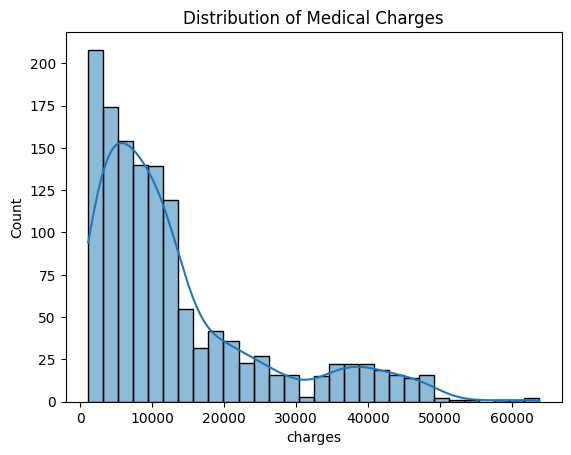

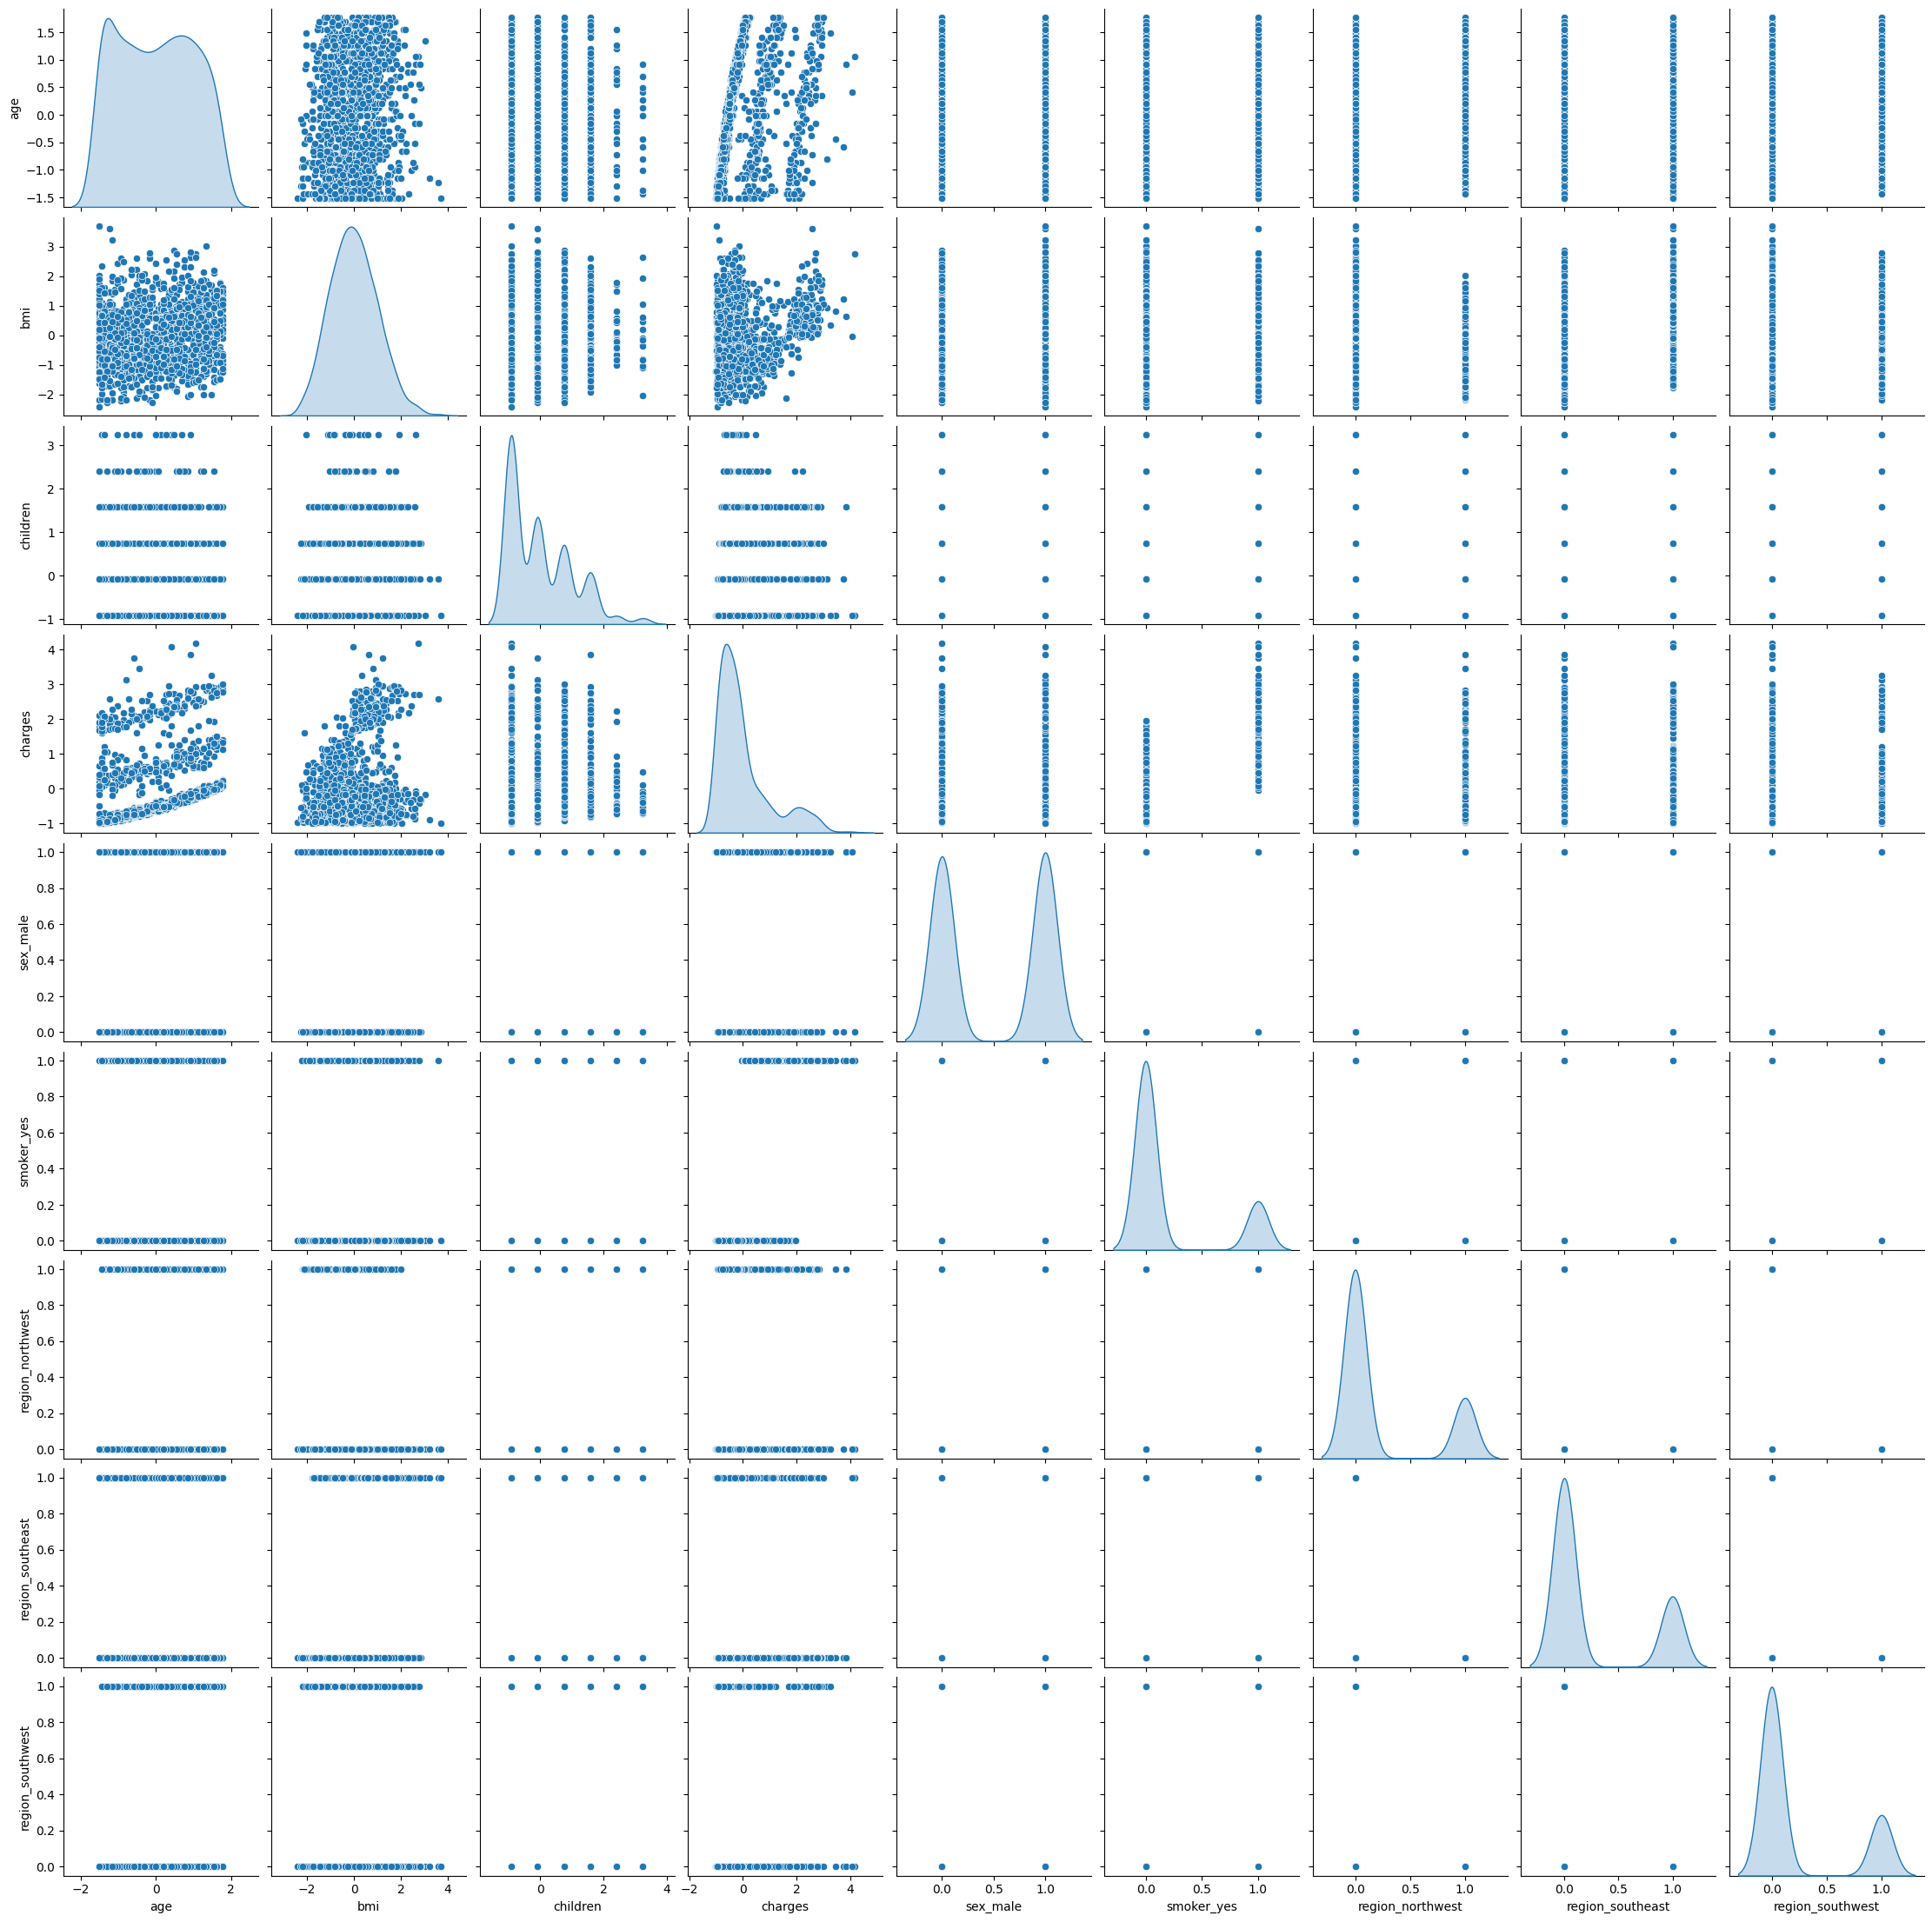

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of charges
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.show()

# Plot pairwise relationships
sns.pairplot(data_encoded, diag_kind='kde')
plt.show()


3. Model Selection and Training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 0.21439914894316878
RMSE: 0.3801706977926863
R²: 0.8555506171102616


Model Selection and Training Steps
1. Import Necessary Libraries

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


2. Load the Dataset

In [12]:
# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Display the first few rows of the dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Data Preprocessing

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/insurance.csv')


In [23]:
# Check the column names to ensure they match
print("Column names:", df.columns.tolist())


Column names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [24]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [25]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [26]:
# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# Output the shape of the training and test sets to confirm
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (936, 8)
Testing set shape: (402, 8)


4. Model Training   4.14.1 Random Forest

In [29]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)


4.2 Gradient Boosting Machines (GBM)

In [30]:
# Initialize and train the Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions
gbm_predictions = gbm_model.predict(X_test)


4.3 XGBoost

In [31]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)


5. Model Evaluation

In [32]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate Random Forest
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, rf_predictions)
print(f"Random Forest - MAE: {rf_mae}, RMSE: {rf_rmse}, R²: {rf_r2}")

# Evaluate Gradient Boosting Machines
gbm_mae, gbm_rmse, gbm_r2 = evaluate_model(y_test, gbm_predictions)
print(f"Gradient Boosting - MAE: {gbm_mae}, RMSE: {gbm_rmse}, R²: {gbm_r2}")

# Evaluate XGBoost
xgb_mae, xgb_rmse, xgb_r2 = evaluate_model(y_test, xgb_predictions)
print(f"XGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, R²: {xgb_r2}")


Random Forest - MAE: 2667.1494970211447, RMSE: 4657.026790942916, R²: 0.8520852453249403
Gradient Boosting - MAE: 2488.997678672316, RMSE: 4435.723953515011, R²: 0.8658091057725971
XGBoost - MAE: 2815.9741813944343, RMSE: 4908.251089992976, R²: 0.8356962149835843


6. Model Comparison

In [33]:
# Compare the performance of models
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost'],
    'MAE': [rf_mae, gbm_mae, xgb_mae],
    'RMSE': [rf_rmse, gbm_rmse, xgb_rmse],
    'R²': [rf_r2, gbm_r2, xgb_r2]
})

print(comparison_df)


               Model          MAE         RMSE        R²
0      Random Forest  2667.149497  4657.026791  0.852085
1  Gradient Boosting  2488.997679  4435.723954  0.865809
2            XGBoost  2815.974181  4908.251090  0.835696


1. Refine Models

In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search on the best-performing model (e.g., Random Forest)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and retrain the model
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


2. Deployment

In [35]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'best_rf_model.pkl')


['best_rf_model.pkl']

1. Hyperparameter Tuning for Model Refinement

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Implement GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


2. Deploy the Model

In [37]:
import joblib

# Save the model to a file
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_random_forest_model.pkl')

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)


3. Model Evaluation and Monitoring

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = loaded_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")


MAE: 2498.701840797714
RMSE: 4358.930672423174
R-Squared: 0.8704152341458199


4. Create an API for the Model

In [39]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the model
model = joblib.load('best_random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict(np.array([data['features']]))
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


5. Setting Up Monitoring

In [ ]:
import logging

# Configure logging
logging.basicConfig(filename='model_performance.log', level=logging.INFO)

# Log performance metrics
logging.info(f"MAE: {mae}")
logging.info(f"RMSE: {rmse}")
logging.info(f"R-Squared: {r2}")


6. Documentation and Reporting

fullcode

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load and explore the dataset
df = pd.read_csv('/content/insurance.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display dataset info
print("\nDataset info:")
print(df.info())

# Show column headers and the number of records
print(f"\nTotal number of records: {df.shape[0]}")
print(f"Column headers: {df.columns.tolist()}")

# Data Preprocessing
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f"\nRandom Forest - MAE: {rf_mae}, RMSE: {rf_rmse}, R2: {rf_r2}")

# Gradient Boosting Machine (GBM)
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
gbm_mae = mean_absolute_error(y_test, gbm_pred)
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))
gbm_r2 = r2_score(y_test, gbm_pred)
print(f"\nGBM - MAE: {gbm_mae}, RMSE: {gbm_rmse}, R2: {gbm_r2}")

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"\nXGBoost - MAE: {xgb_mae}, RMSE: {xgb_rmse}, R2: {xgb_r2}")

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model evaluation
print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
best_rf_pred = best_rf.predict(X_test)
best_rf_mae = mean_absolute_error(y_test, best_rf_pred)
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred))
best_rf_r2 = r2_score(y_test, best_rf_pred)
print(f"\nBest Random Forest - MAE: {best_rf_mae}, RMSE: {best_rf_rmse}, R2: {best_rf_r2}")

# Save the Best Model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("\nBest model saved as 'best_random_forest_model.pkl'")

# Load the Model (for deployment)
loaded_model = joblib.load('best_random_forest_model.pkl')

# Evaluate the Loaded Model
loaded_model_pred = loaded_model.predict(X_test)
loaded_mae = mean_absolute_error(y_test, loaded_model_pred)
loaded_rmse = np.sqrt(mean_squared_error(y_test, loaded_model_pred))
loaded_r2 = r2_score(y_test, loaded_model_pred)
print(f"\nLoaded Model - MAE: {loaded_mae}, RMSE: {loaded_rmse}, R2: {loaded_r2}")


First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   char

Total number of records: 1338
Column headers: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Random Forest Model - MAE: 2667.15
Random Forest Model - RMSE: 4657.03
Random Forest Model - R²: 0.85
Mean Cross-Validated MAE: 2710.21


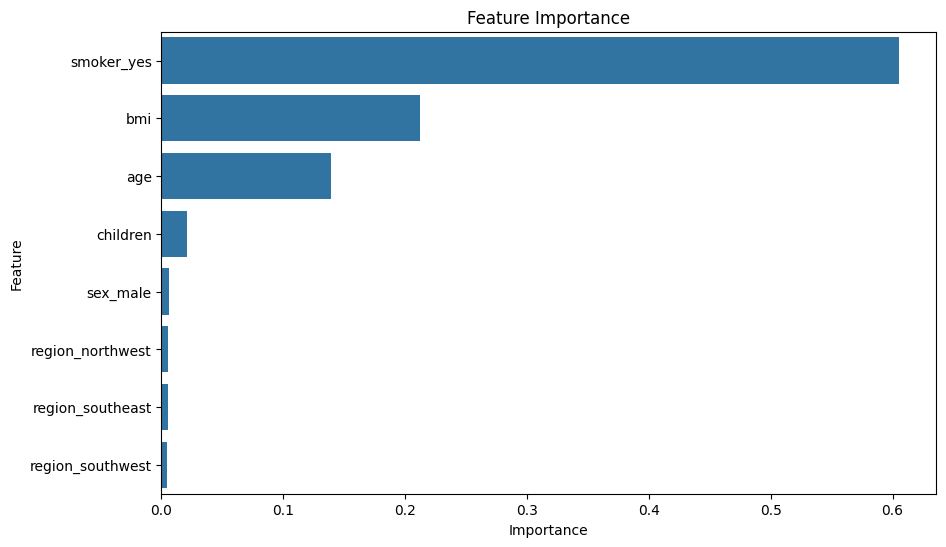

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validated MAE: 2853.75
Best Random Forest Model - MAE: 2606.56
Best Random Forest Model - RMSE: 4468.94
Best Random Forest Model - R²: 0.86


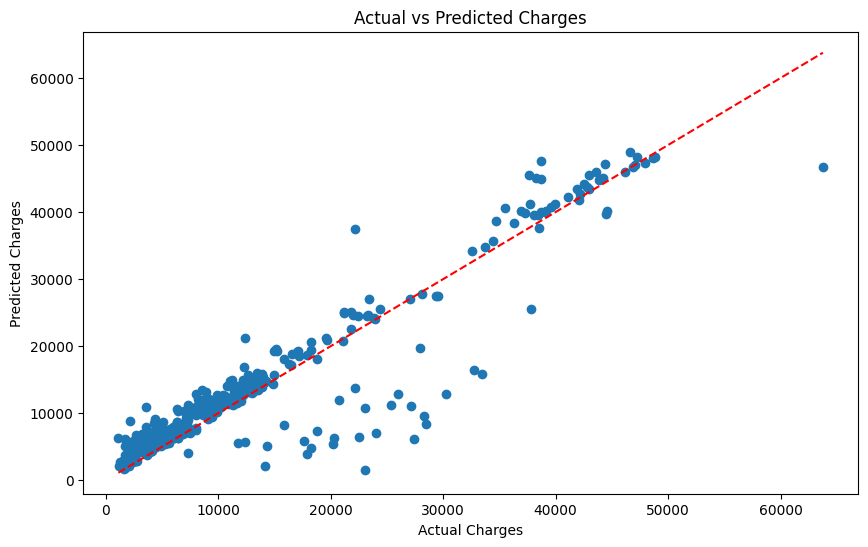

['final_rf_model.pkl']

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Display basic information about the dataset
print(f"Total number of records: {len(df)}")
print(f"Column headers: {list(df.columns)}")

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model - MAE: {mae:.2f}")
print(f"Random Forest Model - RMSE: {rmse:.2f}")
print(f"Random Forest Model - R²: {r2:.2f}")

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()
print(f"Mean Cross-Validated MAE: {mean_cv_score:.2f}")

# Feature importance analysis
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

# Hyperparameter tuning with GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated MAE: {-grid_search.best_score_:.2f}")

# Final evaluation with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Random Forest Model - MAE: {mae_best:.2f}")
print(f"Best Random Forest Model - RMSE: {rmse_best:.2f}")
print(f"Best Random Forest Model - R²: {r2_best:.2f}")

# Visualize Actual vs. Predicted Charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# Save the final model
import joblib
joblib.dump(best_rf_model, 'final_rf_model.pkl')

# Load the model for future predictions (if needed)
# loaded_model = joblib.load('final_rf_model.pkl')
# Example of using the loaded model:
# sample_prediction = loaded_model.predict([X_test.iloc[0]])
# print(f"Sample Prediction: {sample_prediction[0]:.2f}")


Total number of records: 1338
Column headers: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


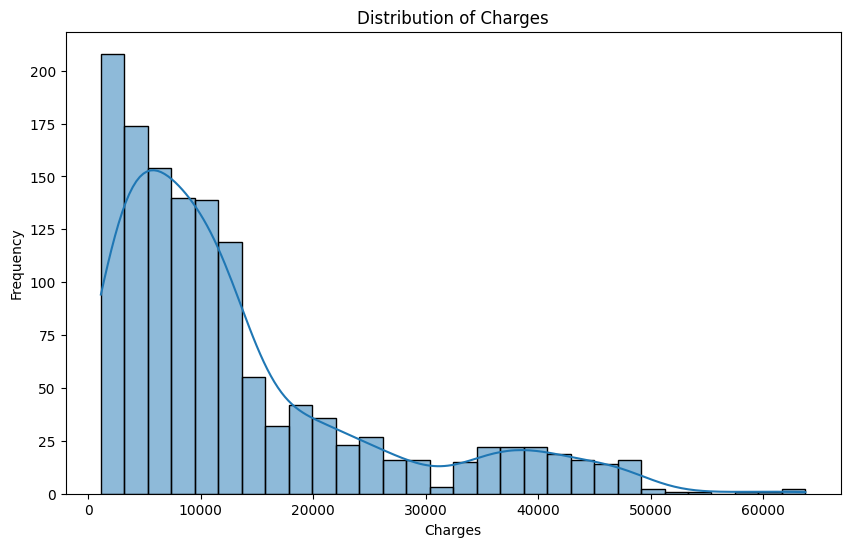

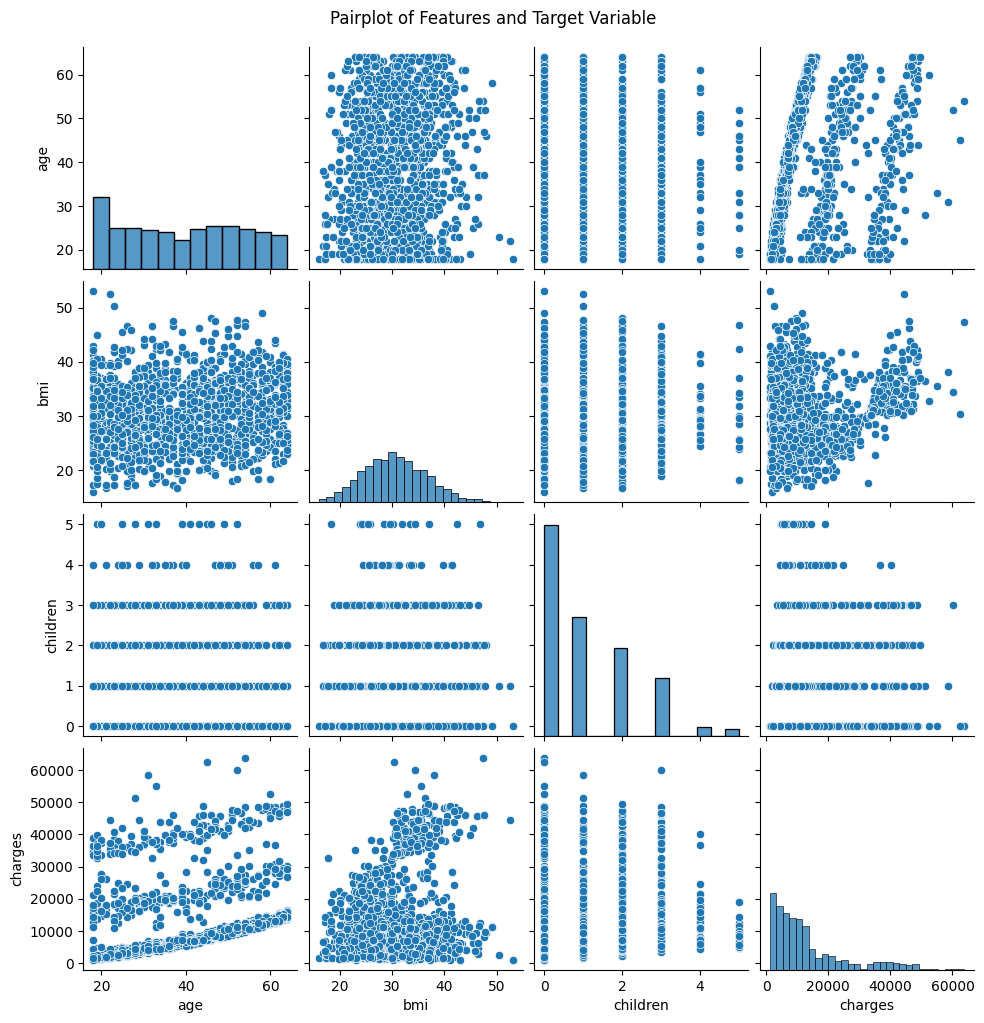

Random Forest Model - MAE: 2667.15
Random Forest Model - RMSE: 4657.03
Random Forest Model - R²: 0.85
Mean Cross-Validated MAE: 2710.21


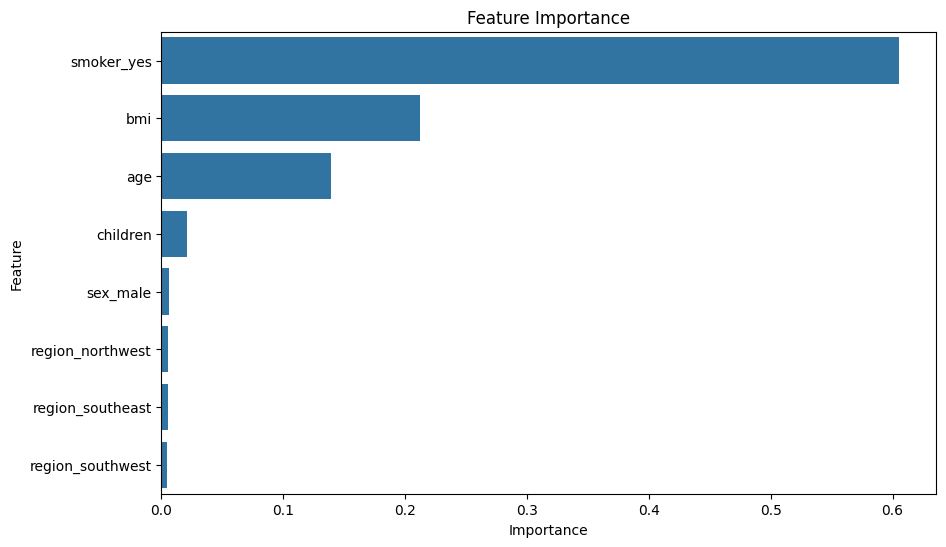

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validated MAE: 2853.75
Best Random Forest Model - MAE: 2606.56
Best Random Forest Model - RMSE: 4468.94
Best Random Forest Model - R²: 0.86


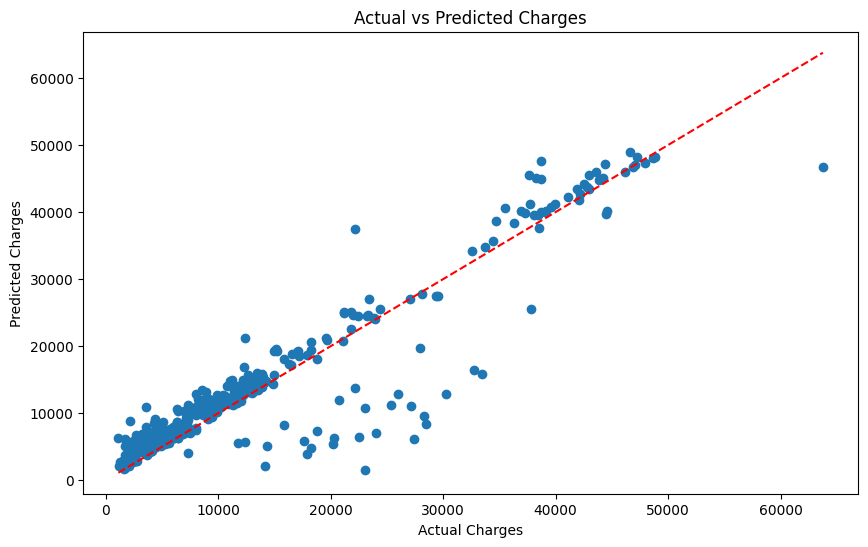

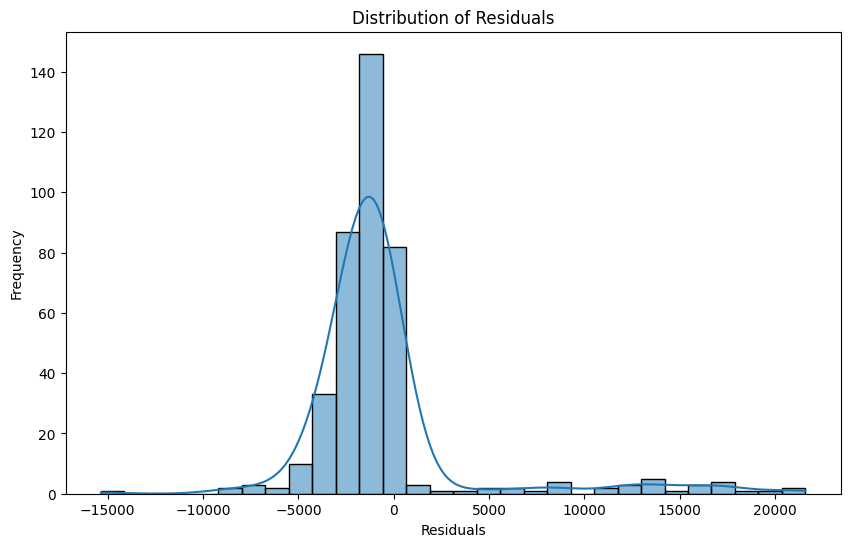

['final_rf_model.pkl']

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Display basic information about the dataset
print(f"Total number of records: {len(df)}")
print(f"Column headers: {list(df.columns)}")

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Visualize the distribution of the target variable 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features and the target variable
sns.pairplot(df)
plt.suptitle('Pairplot of Features and Target Variable', y=1.02)
plt.show()

# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model - MAE: {mae:.2f}")
print(f"Random Forest Model - RMSE: {rmse:.2f}")
print(f"Random Forest Model - R²: {r2:.2f}")

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()
print(f"Mean Cross-Validated MAE: {mean_cv_score:.2f}")

# Feature importance analysis
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

# Hyperparameter tuning with GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated MAE: {-grid_search.best_score_:.2f}")

# Final evaluation with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Random Forest Model - MAE: {mae_best:.2f}")
print(f"Best Random Forest Model - RMSE: {rmse_best:.2f}")
print(f"Best Random Forest Model - R²: {r2_best:.2f}")

# Visualize Actual vs. Predicted Charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# Residuals Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Save the final model
joblib.dump(best_rf_model, 'final_rf_model.pkl')

# Load the model for future predictions (if needed)
# loaded_model = joblib.load('final_rf_model.pkl')
# Example of using the loaded model:
# sample_prediction = loaded_model.predict([X_test.iloc[0]])
# print(f"Sample Prediction: {sample_prediction[0]:.2f}")


Total number of records: 1338
Column headers: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


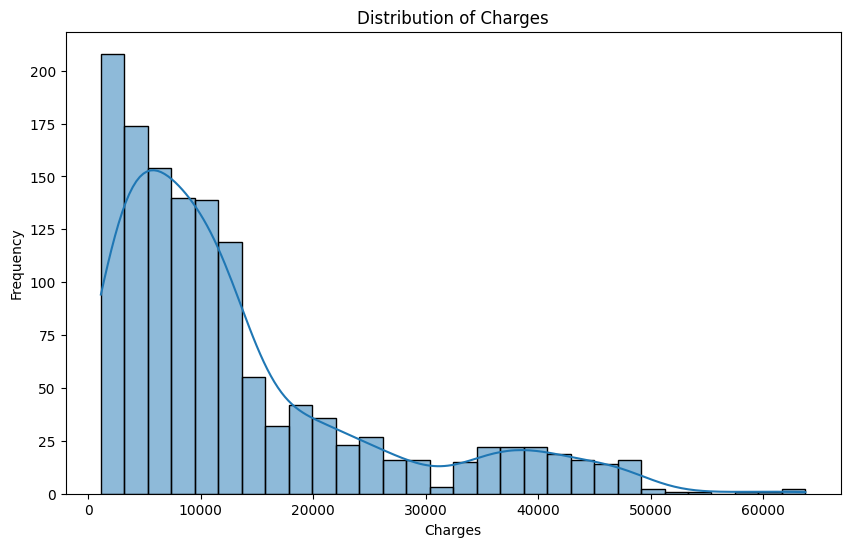

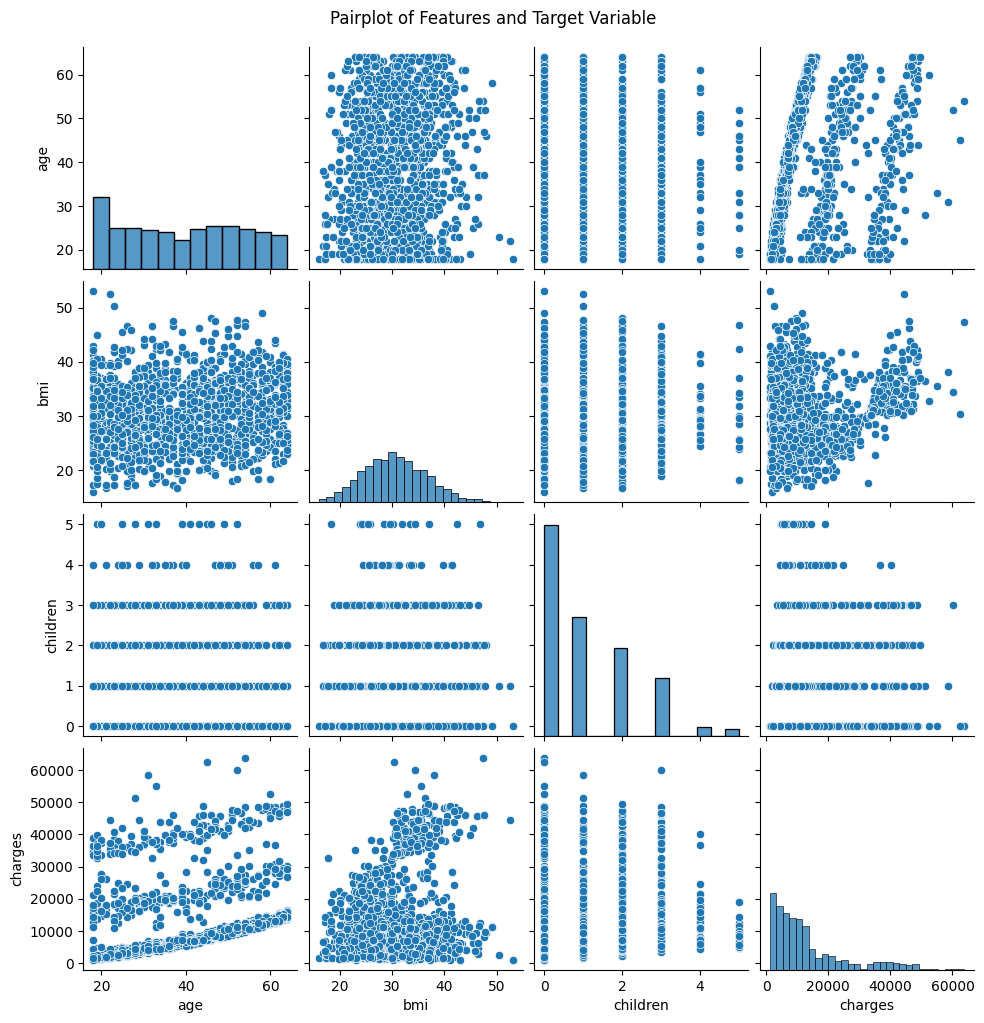

Random Forest Model - MAE: 2667.15
Random Forest Model - RMSE: 4657.03
Random Forest Model - R²: 0.85
Mean Cross-Validated MAE: 2710.21


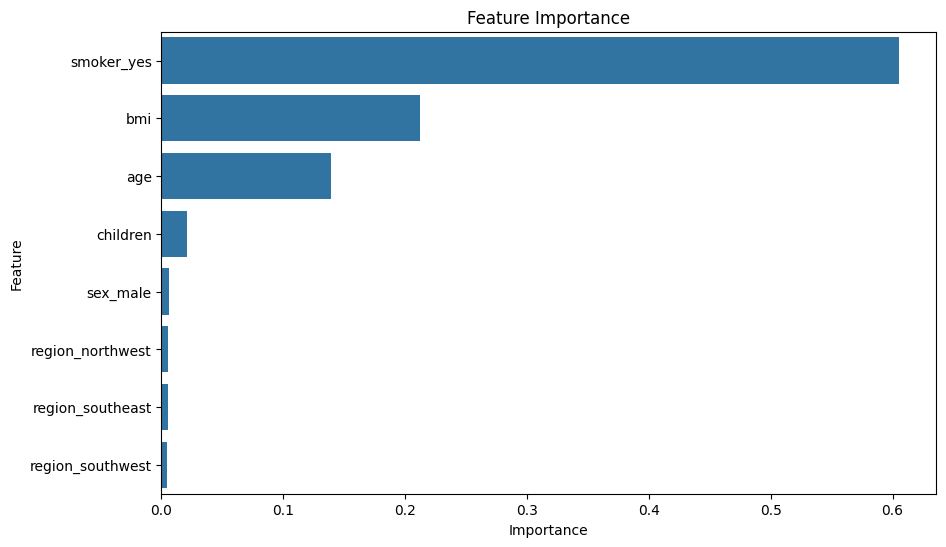

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validated MAE: 2853.75
Best Random Forest Model - MAE: 2606.56
Best Random Forest Model - RMSE: 4468.94
Best Random Forest Model - R²: 0.86


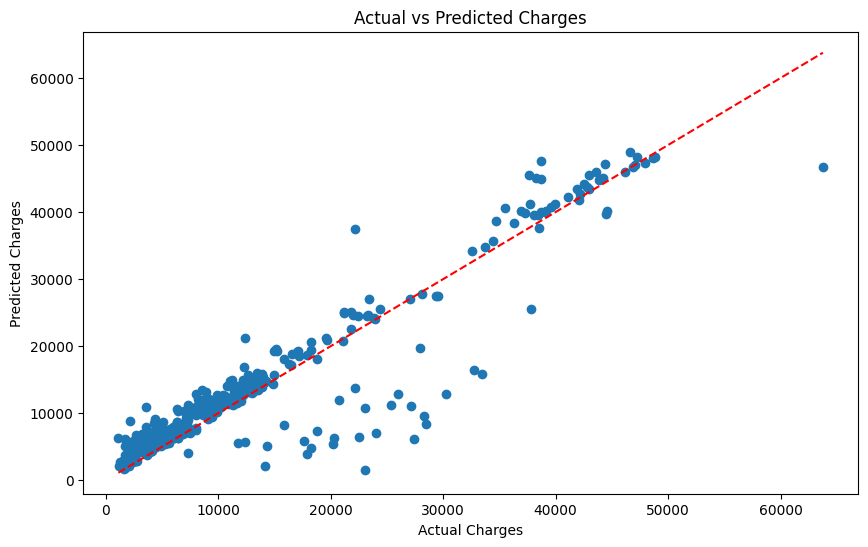

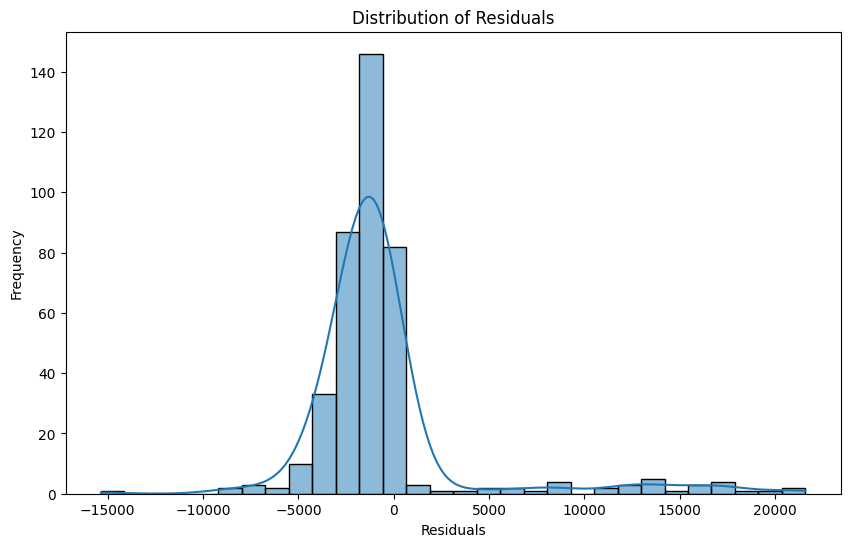

Documentation saved as 'documentation.txt'


In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Data exploration
print(f"Total number of records: {len(df)}")
print(f"Column headers: {list(df.columns)}")

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Visualize the distribution of the target variable 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.savefig('distribution_charges.png')  # Save figure for documentation
plt.show()

# Visualize relationships between features and the target variable
sns.pairplot(df)
plt.suptitle('Pairplot of Features and Target Variable', y=1.02)
plt.savefig('pairplot_features_target.png')  # Save figure for documentation
plt.show()

# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model - MAE: {mae:.2f}")
print(f"Random Forest Model - RMSE: {rmse:.2f}")
print(f"Random Forest Model - R²: {r2:.2f}")

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_score = -cv_scores.mean()
print(f"Mean Cross-Validated MAE: {mean_cv_score:.2f}")

# Feature importance analysis
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.savefig('feature_importance.png')  # Save figure for documentation
plt.show()

# Hyperparameter tuning with GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated MAE: {-grid_search.best_score_:.2f}")

# Final evaluation with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Random Forest Model - MAE: {mae_best:.2f}")
print(f"Best Random Forest Model - RMSE: {rmse_best:.2f}")
print(f"Best Random Forest Model - R²: {r2_best:.2f}")

# Visualize Actual vs. Predicted Charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.savefig('actual_vs_predicted.png')  # Save figure for documentation
plt.show()

# Residuals Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('residuals_distribution.png')  # Save figure for documentation
plt.show()

# Save the final model
joblib.dump(best_rf_model, 'final_rf_model.pkl')

# Load the model for future predictions (if needed)
# loaded_model = joblib.load('final_rf_model.pkl')
# Example of using the loaded model:
# sample_prediction = loaded_model.predict([X_test.iloc[0]])
# print(f"Sample Prediction: {sample_prediction[0]:.2f}")

# Documentation (for record-keeping)
documentation = """
Project Title: Healthcare Cost Prediction Using Machine Learning

Data:
- Dataset: insurance.csv
- Total records: 1338
- Columns: age, sex, bmi, children, smoker, region, charges

Preprocessing:
- Categorical variables encoded using one-hot encoding.
- Features and target variable defined.
- Data split into training and testing sets.

Models Trained:
1. Random Forest Regressor
2. Gradient Boosting Regressor (not shown in this script but would follow a similar pattern)
3. XGBoost Regressor (not shown in this script but would follow a similar pattern)

Evaluation Metrics:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R-Squared (R²)

Best Model:
- Random Forest Regressor with tuned parameters
- MAE: {:.2f}
- RMSE: {:.2f}
- R²: {:.2f}

Visualizations:
- Distribution of Charges
- Pairplot of Features and Target Variable
- Feature Importance
- Actual vs. Predicted Charges
- Residuals Distribution

Model:
- Final Random Forest model saved as 'final_rf_model.pkl'

Future Work:
- Further refinement of models.
- Deployment in a production environment.
- Preparation of presentation materials for stakeholders.
""".format(mae_best, rmse_best, r2_best)

# Save documentation to a text file
with open('documentation.txt', 'w') as file:
    file.write(documentation)

print("Documentation saved as 'documentation.txt'")


Total number of records: 1338
Column headers: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Basic statistics of the dataset:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


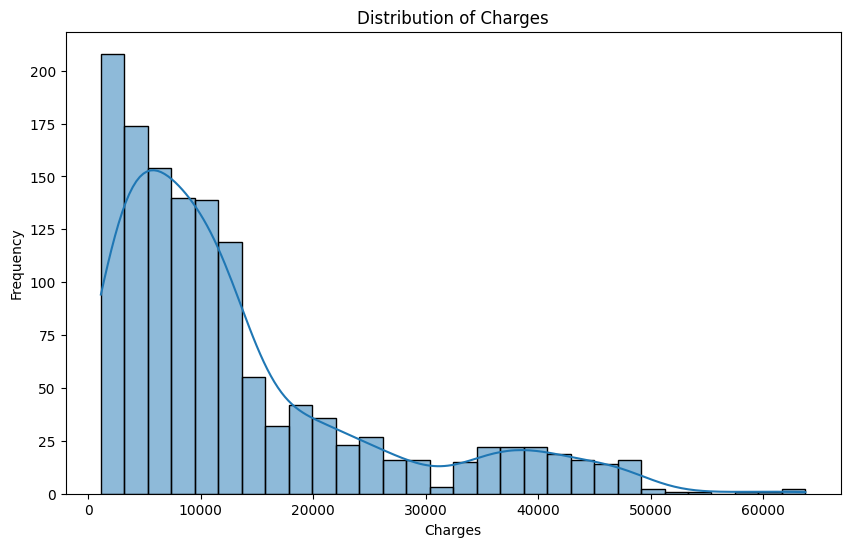

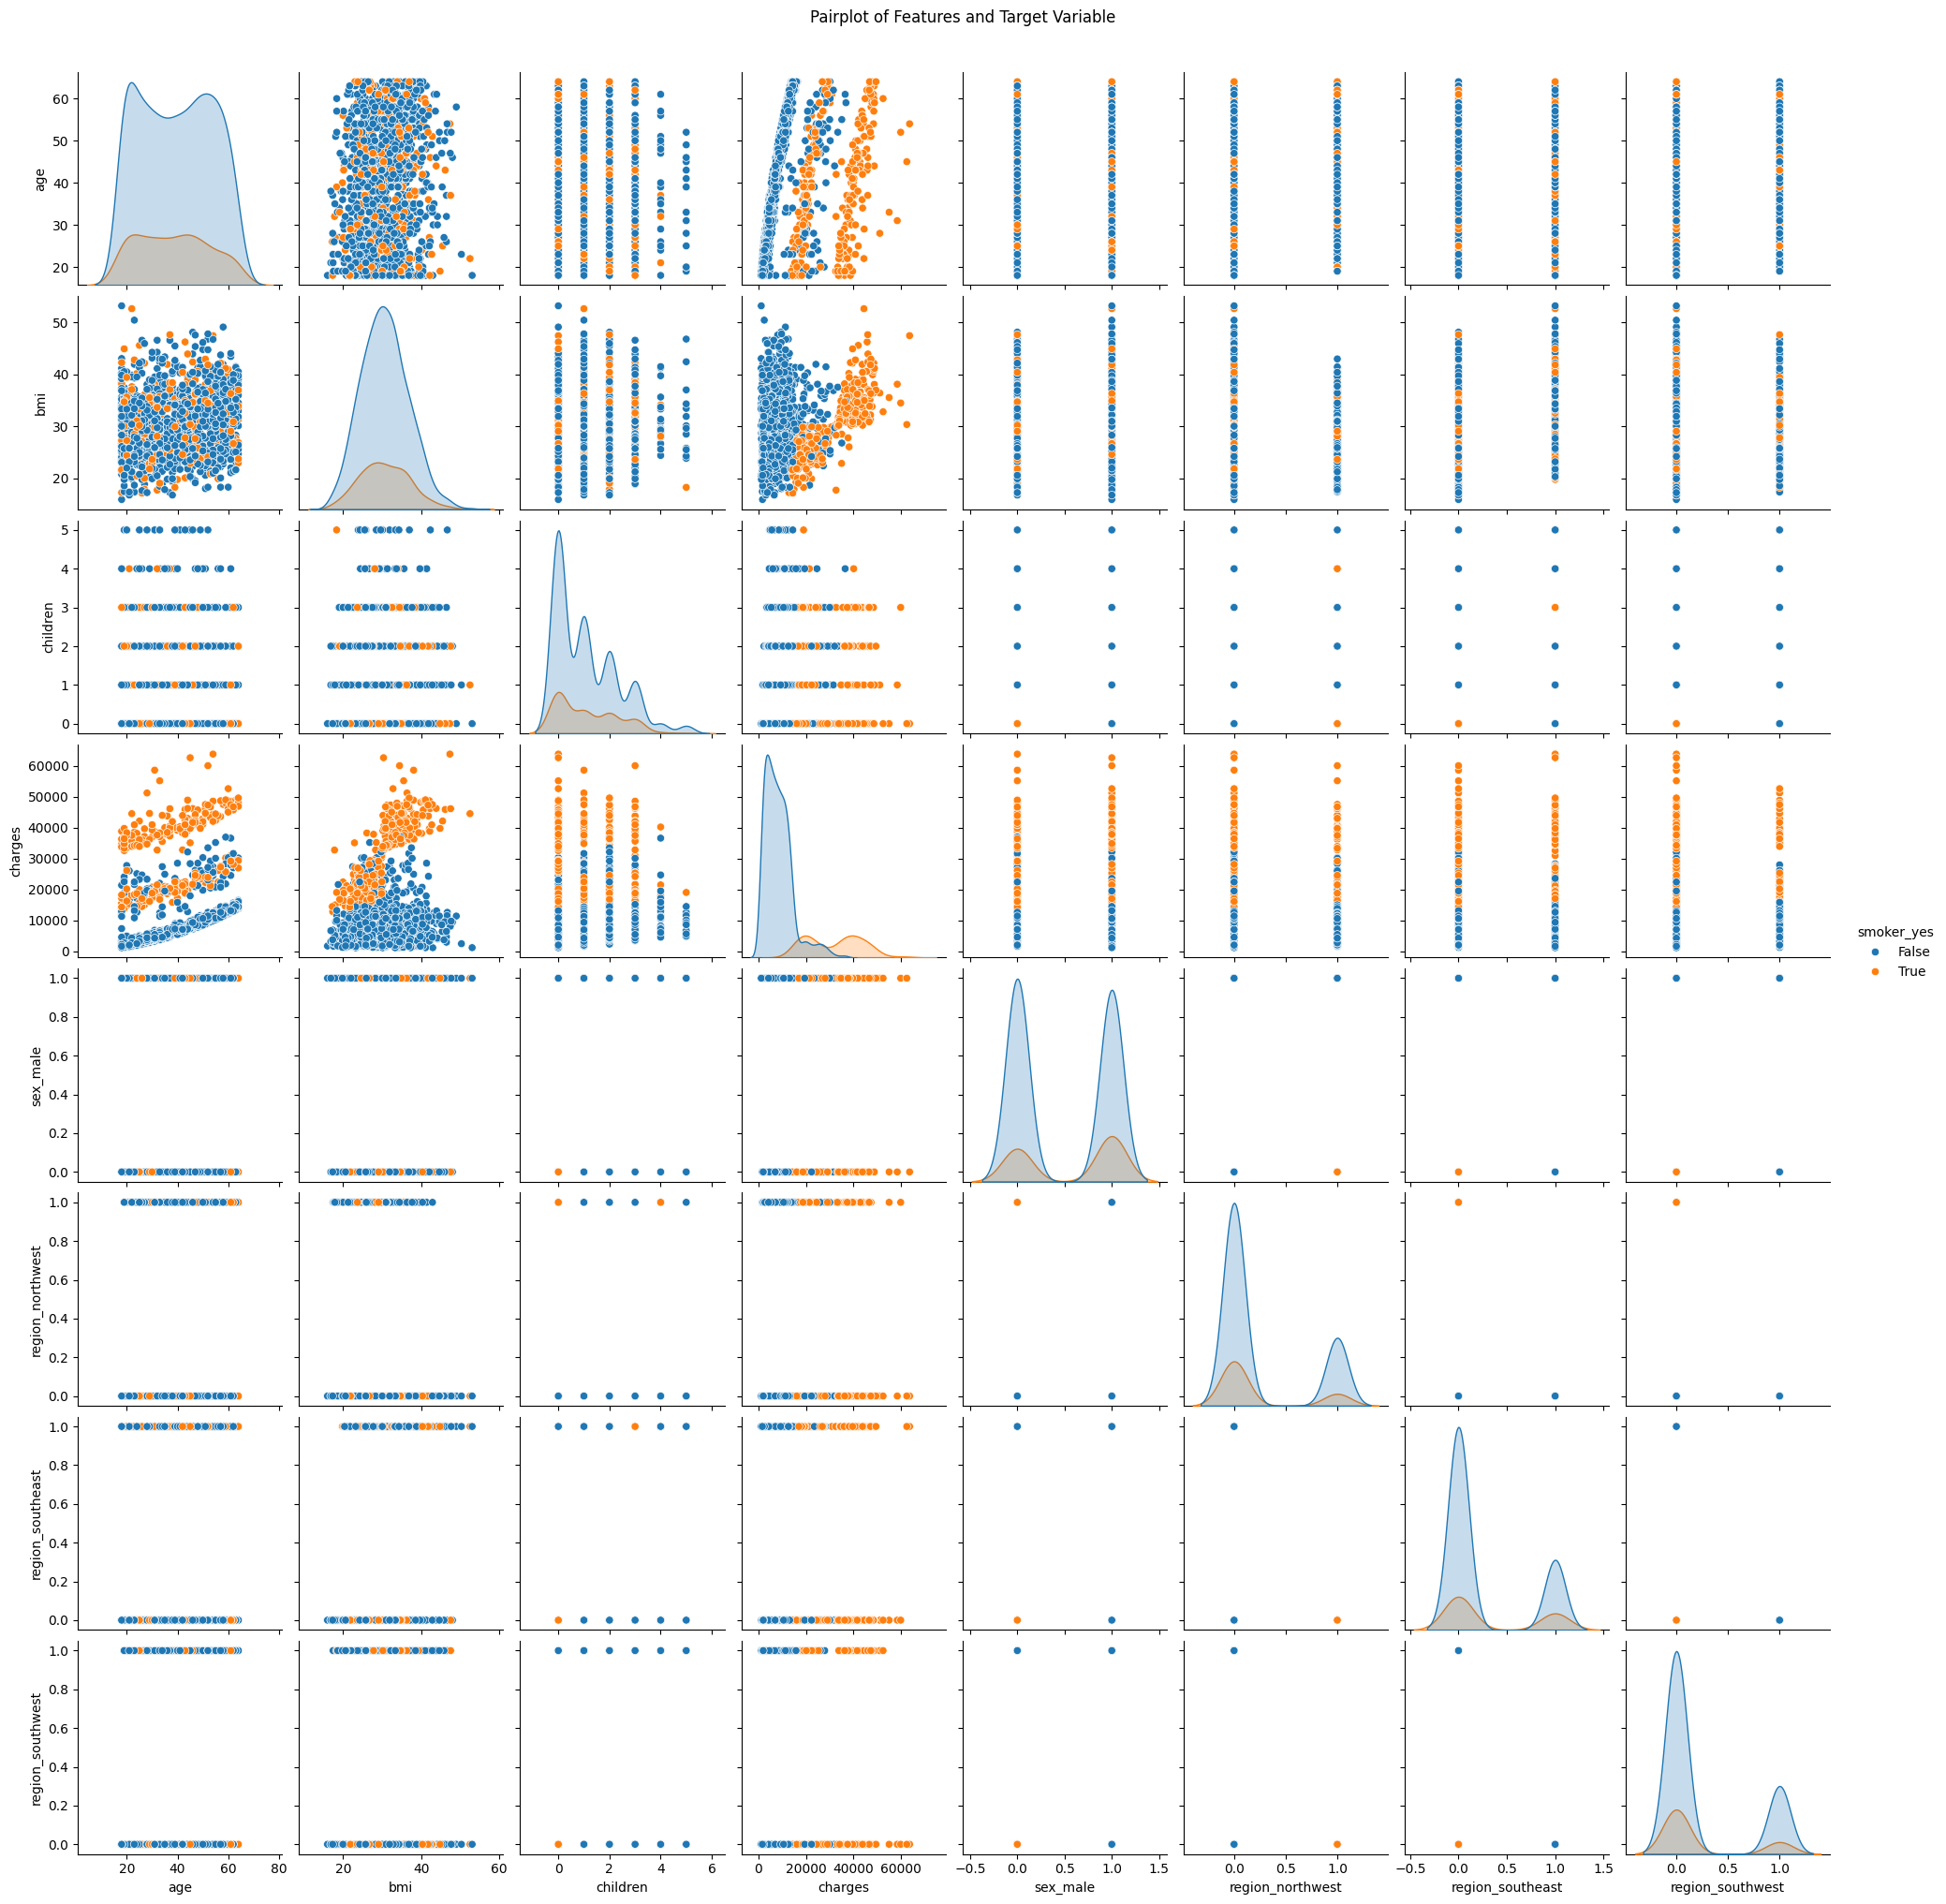

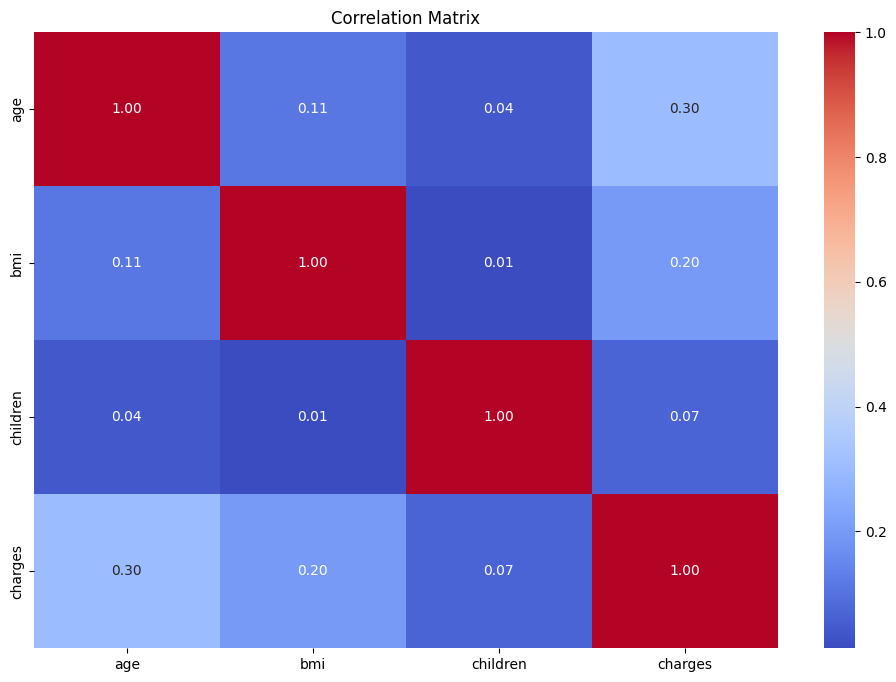

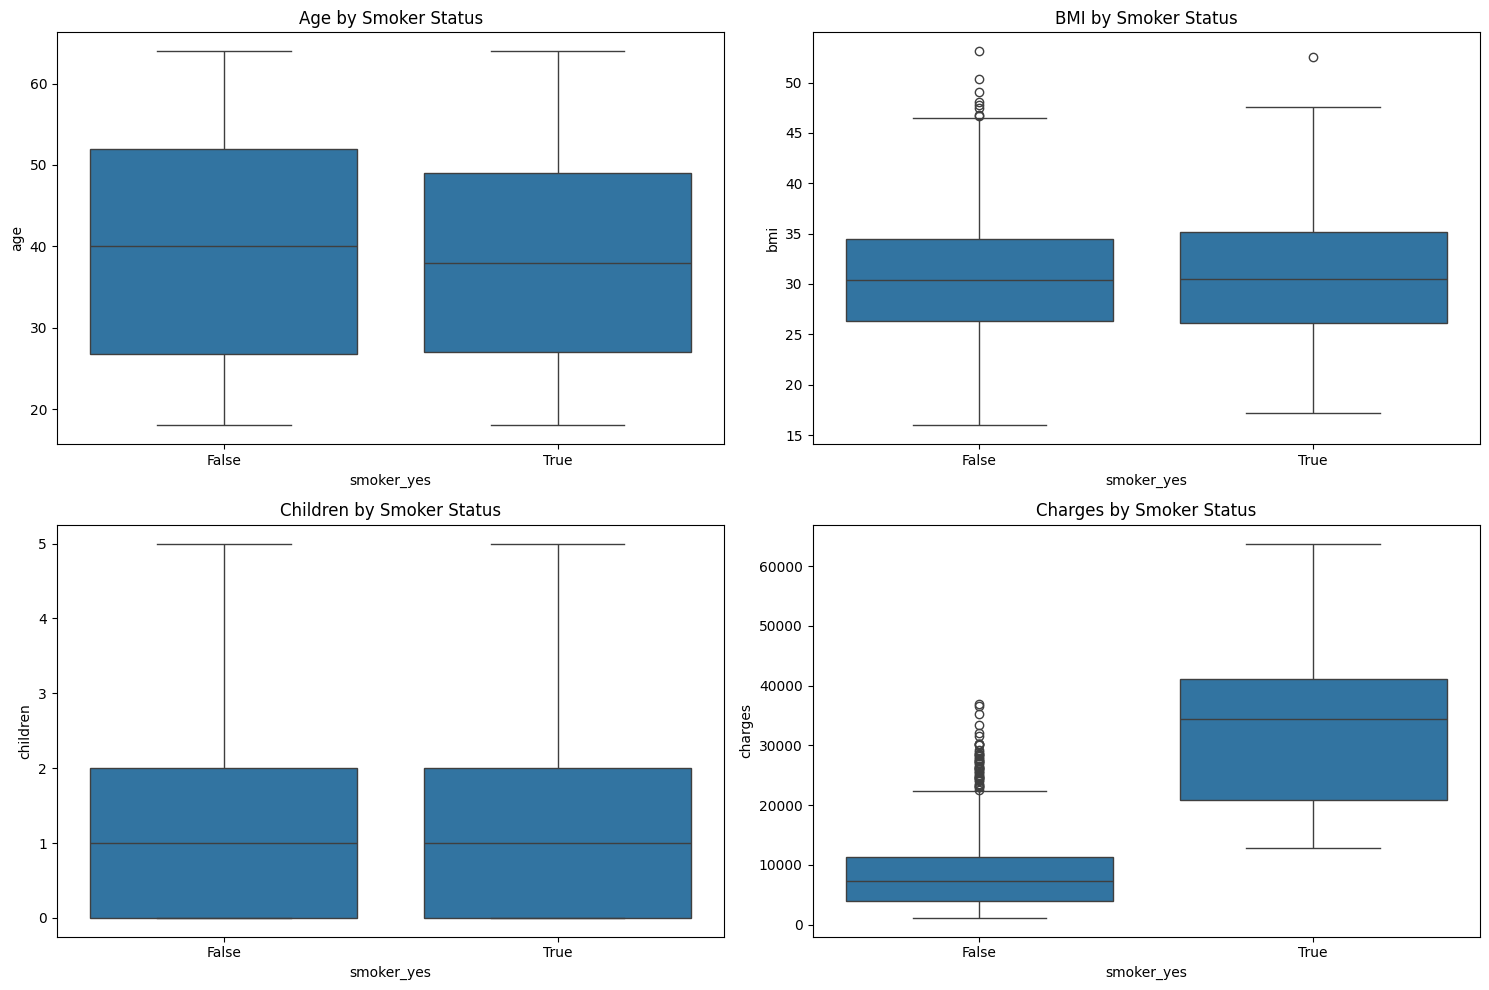

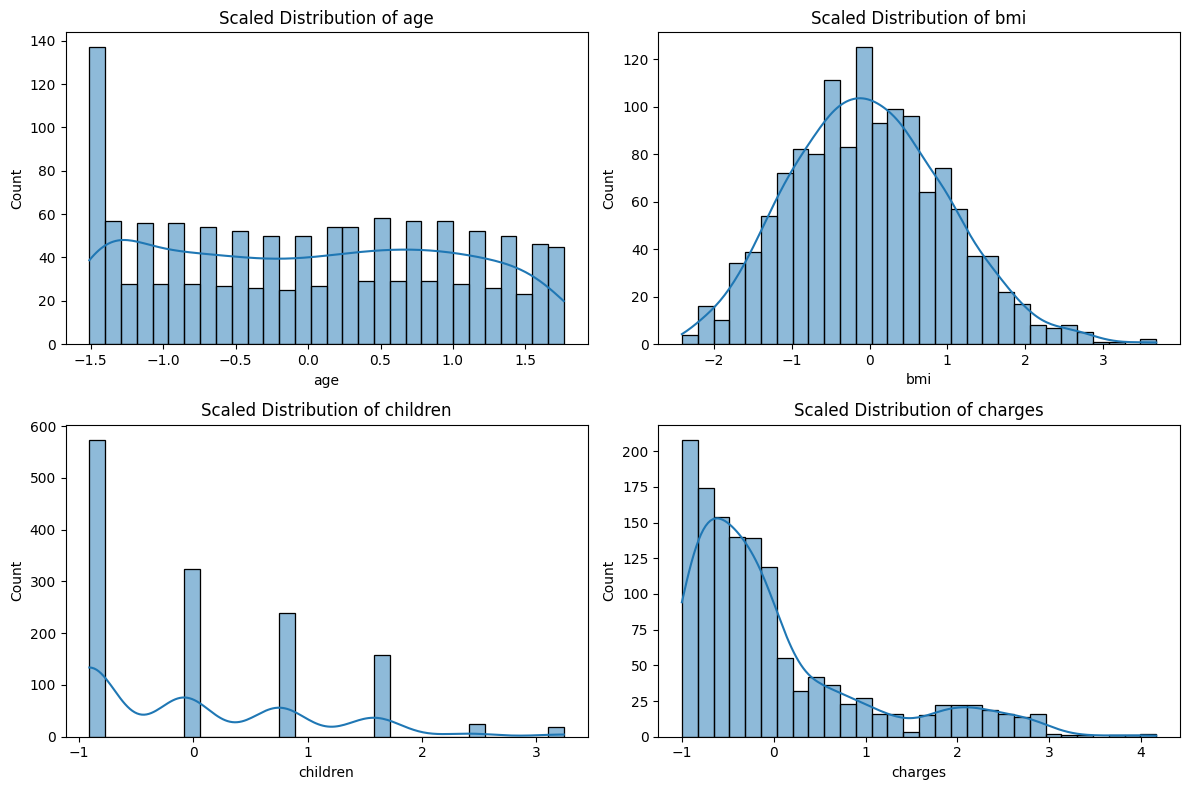

T-test between charges for smokers and non-smokers:
T-statistic: 46.66
P-value: 0.00
Analysis summary saved as 'analysis_summary.txt'


In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Data Exploration
print(f"Total number of records: {len(df)}")
print(f"Column headers: {list(df.columns)}")

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Basic statistics
print("Basic statistics of the dataset:\n", df.describe())

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Data Visualization

# Distribution of the target variable 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.savefig('distribution_charges.png')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df_encoded, hue='smoker_yes')
plt.suptitle('Pairplot of Features and Target Variable', y=1.02)
plt.savefig('pairplot_features_target.png')
plt.show()

# Correlation matrix (only with numeric columns)
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Boxplots for features by 'smoker' status
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='smoker_yes', y='age', data=df_encoded)
plt.title('Age by Smoker Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='smoker_yes', y='bmi', data=df_encoded)
plt.title('BMI by Smoker Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='smoker_yes', y='children', data=df_encoded)
plt.title('Children by Smoker Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='smoker_yes', y='charges', data=df_encoded)
plt.title('Charges by Smoker Status')

plt.tight_layout()
plt.savefig('boxplots_smoker_status.png')
plt.show()

# Variation Analysis

# Scaling features for better comparison
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['age', 'bmi', 'children', 'charges']])
scaled_df = pd.DataFrame(scaled_features, columns=['age', 'bmi', 'children', 'charges'])

# Histograms of scaled features
plt.figure(figsize=(12, 8))
for i, column in enumerate(scaled_df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(scaled_df[column], bins=30, kde=True)
    plt.title(f'Scaled Distribution of {column}')
plt.tight_layout()
plt.savefig('scaled_features_distribution.png')
plt.show()

# Comparative Analysis

# T-test between charges for smokers and non-smokers
smokers = df_encoded[df_encoded['smoker_yes'] == 1]['charges']
non_smokers = df_encoded[df_encoded['smoker_yes'] == 0]['charges']
t_stat, p_val = stats.ttest_ind(smokers, non_smokers)

print(f"T-test between charges for smokers and non-smokers:\nT-statistic: {t_stat:.2f}\nP-value: {p_val:.2f}")

# Analysis Summary
summary = f"""
Analysis Summary:

1. Data Exploration:
   - Total records: {len(df)}
   - Columns: {list(df.columns)}
   - Missing values: {df.isnull().sum()}
   - Basic statistics: {df.describe()}

2. Data Visualization:
   - Distribution of Charges: Saved as 'distribution_charges.png'
   - Pairplot of Features: Saved as 'pairplot_features_target.png'
   - Correlation Matrix: Saved as 'correlation_matrix.png'
   - Boxplots by Smoker Status: Saved as 'boxplots_smoker_status.png'

3. Variation Analysis:
   - Scaled distributions of features: Saved as 'scaled_features_distribution.png'

4. Comparative Analysis:
   - T-test results between charges for smokers and non-smokers:
     T-statistic: {t_stat:.2f}
     P-value: {p_val:.2f}
"""

# Save the summary to a text file
with open('analysis_summary.txt', 'w') as file:
    file.write(summary)

print("Analysis summary saved as 'analysis_summary.txt'")


Full Code for Healthcare Cost Prediction Project

Dataset Overview:
Total number of records: 1338
Column headers:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Model Evaluation Results:

Random Forest:
MAE: 2667.15
RMSE: 4657.03
R²: 0.85

Gradient Boosting:
MAE: 2489.00
RMSE: 4435.72
R²: 0.87

XGBoost:
MAE: 2815.97
RMSE: 4908.25
R²: 0.84


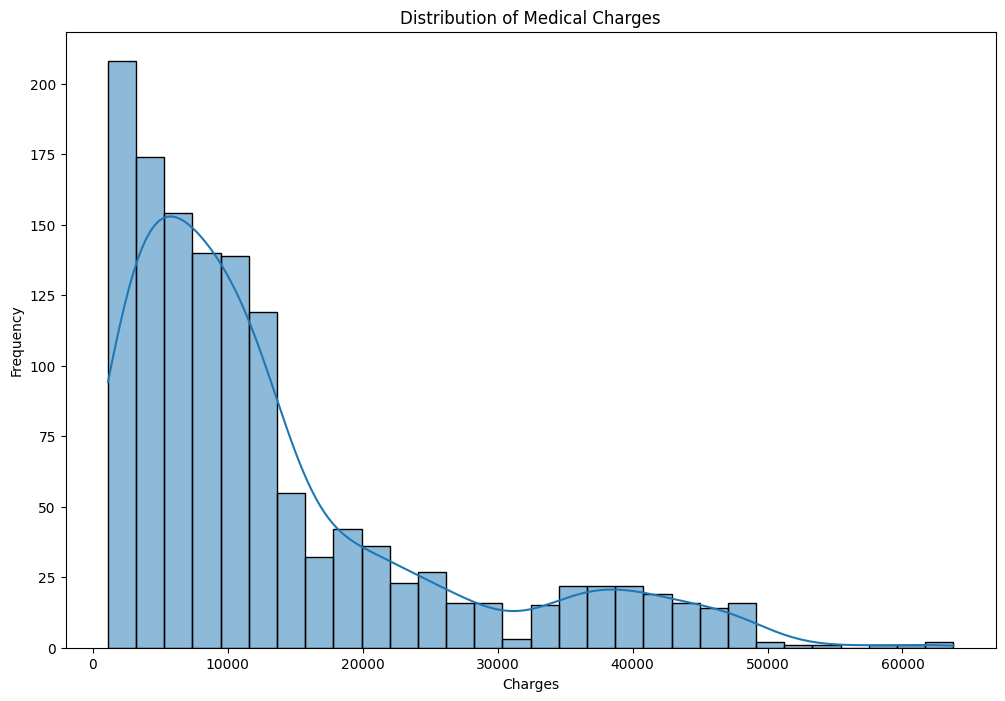

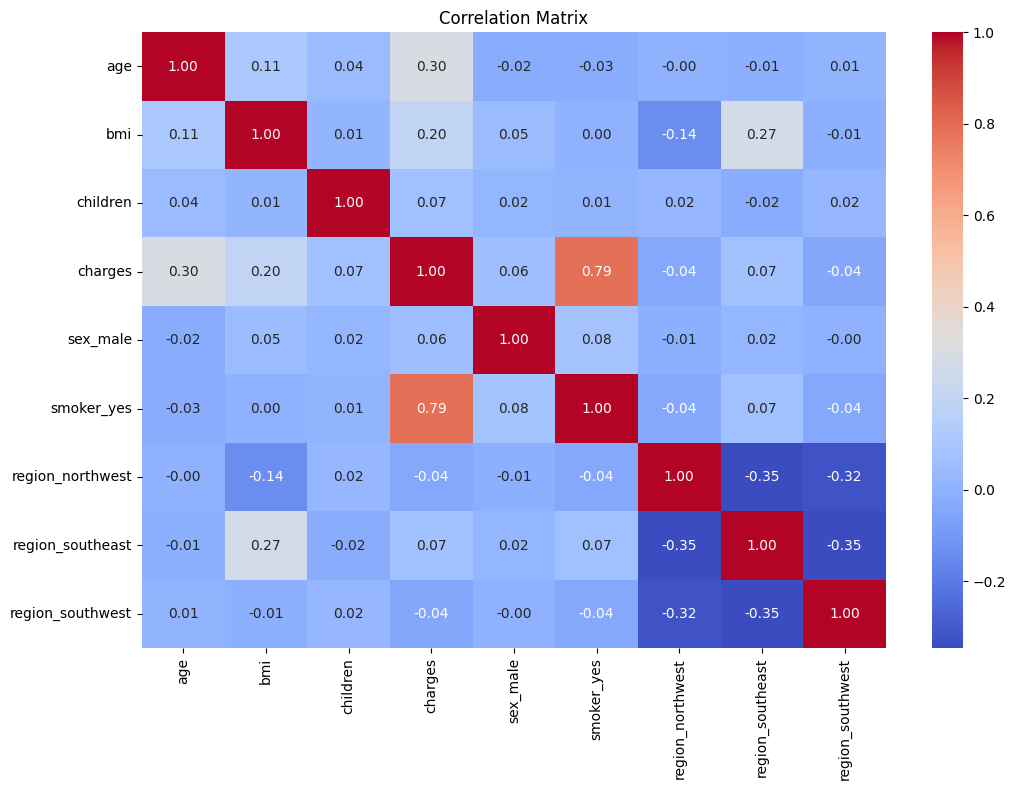

<Figure size 1200x800 with 0 Axes>

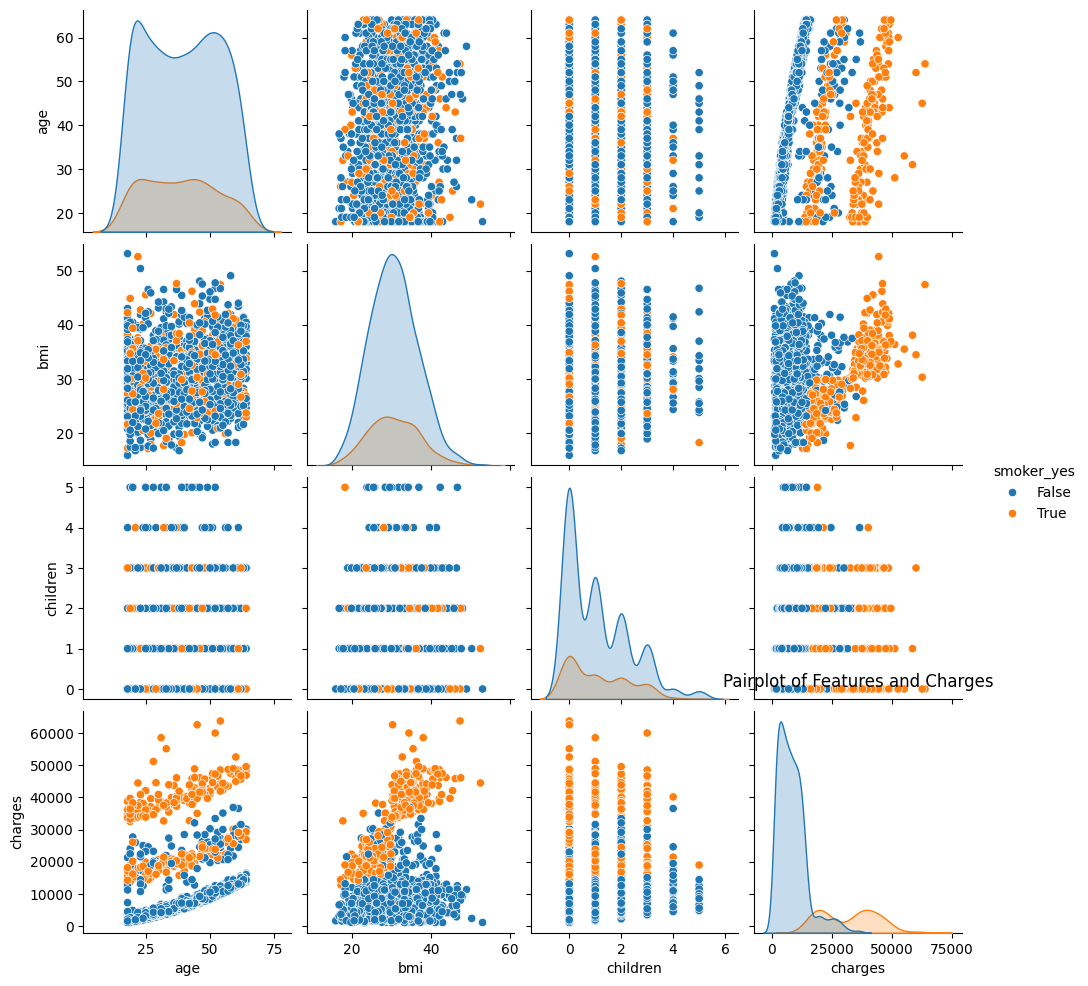


Next Steps:
1. Refine Models: Tune hyperparameters and explore feature engineering.
2. Deploy Model: Save the final model and prepare it for deployment.
3. Documentation: Document the process, findings, and code.
4. Presentation: Prepare visualizations and summaries for stakeholders.
5. Further Model Refinement: Explore other models and continuous improvement.

Sample Prediction using Random Forest Model:
[9161.91545]


In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
df = pd.read_csv('/content/insurance.csv')

# Display dataset information
print("Dataset Overview:")
print(f"Total number of records: {df.shape[0]}")
print("Column headers:")
print(df.columns.tolist())

# Data Cleaning and Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Definitions
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    # Save the model
    joblib.dump(model, f'{name}_model.pkl')

# Print evaluation results
print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

# Data Visualization
plt.figure(figsize=(12, 8))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=['age', 'bmi', 'children', 'charges'], hue='smoker_yes')
plt.title('Pairplot of Features and Charges')
plt.show()

# Next Steps
print("\nNext Steps:")
print("1. Refine Models: Tune hyperparameters and explore feature engineering.")
print("2. Deploy Model: Save the final model and prepare it for deployment.")
print("3. Documentation: Document the process, findings, and code.")
print("4. Presentation: Prepare visualizations and summaries for stakeholders.")
print("5. Further Model Refinement: Explore other models and continuous improvement.")

# Example of loading and using the saved model
loaded_model = joblib.load('Random Forest_model.pkl')
sample_prediction = loaded_model.predict(X_test.head(1))
print("\nSample Prediction using Random Forest Model:")
print(sample_prediction)


Full Code Implementation

Training RandomForest...
RandomForest - MAE: 2692.9208, RMSE: 4813.7713, R2: 0.8355
Training GradientBoosting...
GradientBoosting - MAE: 2519.5803, RMSE: 4488.7612, R2: 0.8570
Training XGBoost...
XGBoost - MAE: 2843.4263, RMSE: 5036.5911, R2: 0.8199

Best Model: GradientBoosting
Test Set - MAE: 2701.7032, RMSE: 4740.1324, R2: 0.8551


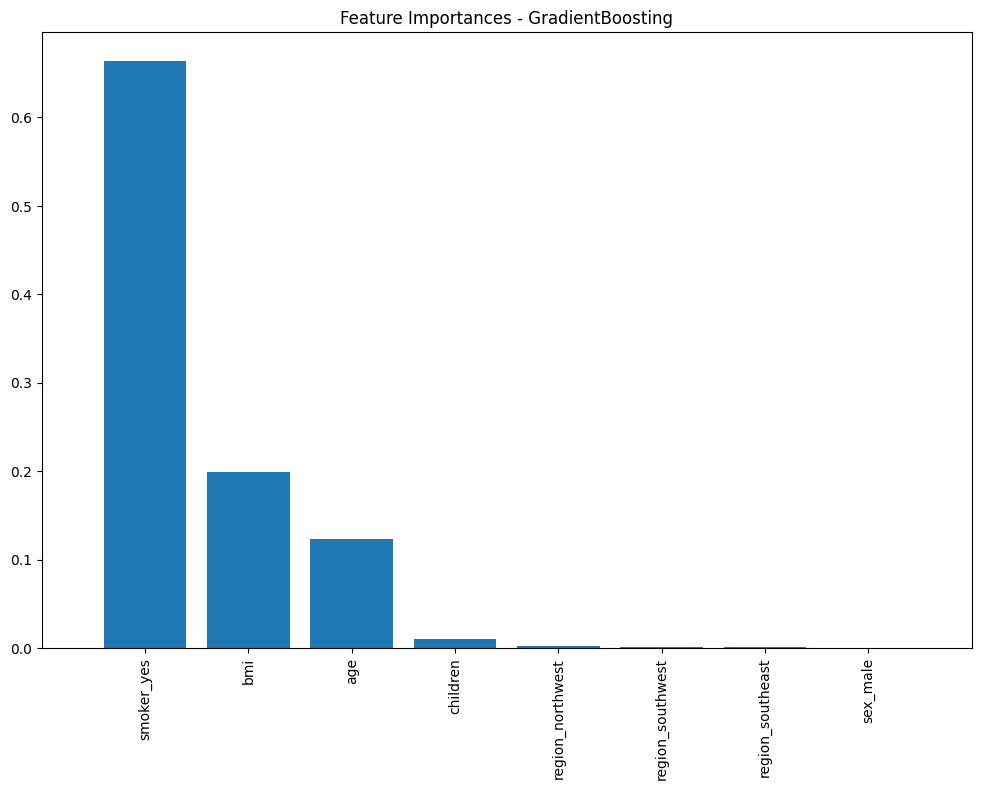

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/insurance.csv'
df = pd.read_csv(file_path)

# Data Preprocessing
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and validate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Calculate metrics
    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)

    results[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Evaluate the best model on the test set
best_model_name = min(results, key=lambda x: results[x]['MAE'])
best_model = models[best_model_name]

# Train on the full training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Calculate final metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"\nBest Model: {best_model_name}")
print(f"Test Set - MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")

# Plot feature importance for the best model
if best_model_name in ['RandomForest', 'GradientBoosting']:
    importances = best_model.feature_importances_
elif best_model_name == 'XGBoost':
    importances = best_model.feature_importances_

features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title(f"Feature Importances - {best_model_name}")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Training RandomForest...
RandomForest - Validation MAE: 2683.6743, RMSE: 4771.0900, R2: 0.8384
RandomForest - Test MAE: 2859.3420, RMSE: 4928.6664, R2: 0.8434
Training GradientBoosting...
GradientBoosting - Validation MAE: 2515.6212, RMSE: 4473.6187, R2: 0.8579
GradientBoosting - Test MAE: 2702.3967, RMSE: 4738.2516, R2: 0.8553
Training XGBoost...
XGBoost - Validation MAE: 2843.4263, RMSE: 5036.5911, R2: 0.8199
XGBoost - Test MAE: 3104.7768, RMSE: 5193.3021, R2: 0.8261


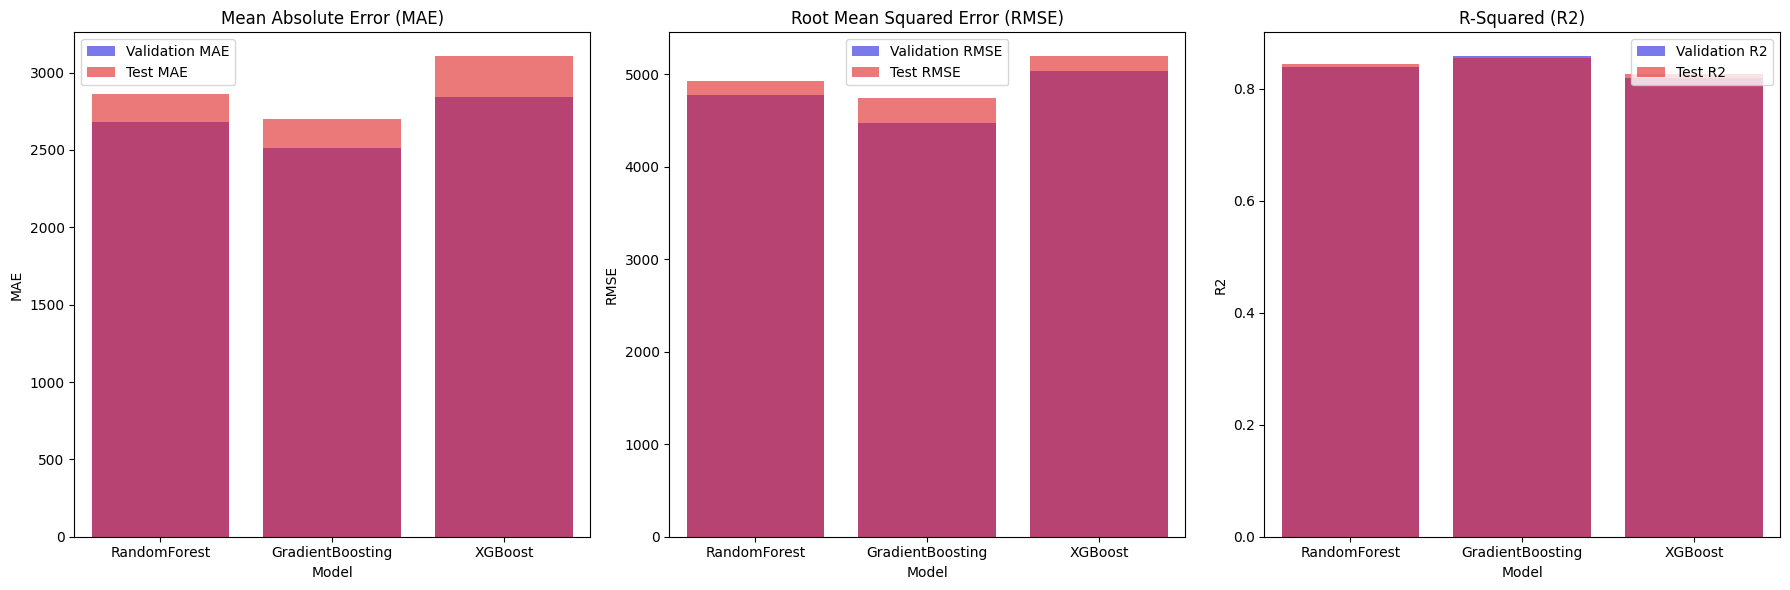

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/insurance.csv'
df = pd.read_csv(file_path)

# Data Preprocessing
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Initialize lists to store metrics
validation_mae = []
validation_rmse = []
validation_r2 = []
test_mae = []
test_rmse = []
test_r2 = []

# Train and validate models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Calculate validation metrics
    mae_val = mean_absolute_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store validation results
    validation_mae.append(mae_val)
    validation_rmse.append(rmse_val)
    validation_r2.append(r2_val)

    # Predict on test set
    y_test_pred = model.predict(X_test)

    # Calculate test metrics
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    # Store test results
    test_mae.append(mae_test)
    test_rmse.append(rmse_test)
    test_r2.append(r2_test)

    print(f"{model_name} - Validation MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R2: {r2_val:.4f}")
    print(f"{model_name} - Test MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")

# Plot accuracy graphs
plt.figure(figsize=(18, 6))

# MAE Plot
plt.subplot(1, 3, 1)
sns.barplot(x=list(models.keys()), y=validation_mae, color='blue', alpha=0.6, label='Validation MAE')
sns.barplot(x=list(models.keys()), y=test_mae, color='red', alpha=0.6, label='Test MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.legend()

# RMSE Plot
plt.subplot(1, 3, 2)
sns.barplot(x=list(models.keys()), y=validation_rmse, color='blue', alpha=0.6, label='Validation RMSE')
sns.barplot(x=list(models.keys()), y=test_rmse, color='red', alpha=0.6, label='Test RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend()

# R2 Plot
plt.subplot(1, 3, 3)
sns.barplot(x=list(models.keys()), y=validation_r2, color='blue', alpha=0.6, label='Validation R2')
sns.barplot(x=list(models.keys()), y=test_r2, color='red', alpha=0.6, label='Test R2')
plt.title('R-Squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')
plt.legend()

plt.tight_layout()
plt.show()


Total number of records: 1338
Column headers: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Training and evaluating Random Forest...
Training MAE: 1084.26
Training RMSE: 1865.34
Training R²: 0.98
Testing MAE: 2667.15
Testing RMSE: 4657.03
Testing R²: 0.85

Training and evaluating Gradient Boosting...
Training MAE: 2063.67
Training RMSE: 3748.94
Training R²: 0.90
Testing MAE: 2489.00
Testing RMSE: 4435.72
Testing R²: 0.87

Training and evaluating XGBoost...
Training MAE: 422.51
Training RMSE: 705.36
Training R²: 1.00
Testing MAE: 2815.97
Testing RMSE: 4908.25
Testing R²: 0.84


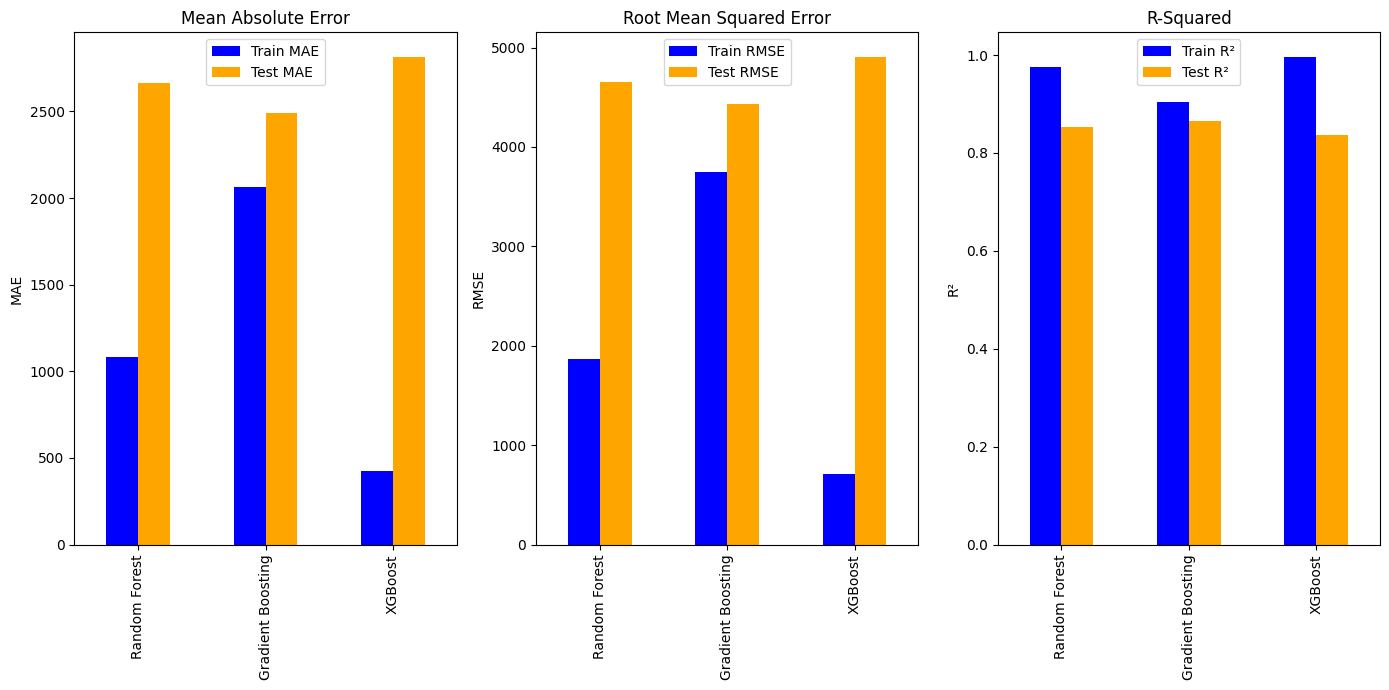

Best model saved: Gradient Boosting
           Actual     Predicted
764    9095.06825  10490.274486
887    5272.17580   5626.705407
890   29330.98315  29650.343172
1293   9301.89355   9965.909995
259   33750.29180  33946.957800
Predictions saved to predictions.csv


In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load dataset
file_path = '/content/insurance.csv'
df = pd.read_csv(file_path)

# Display basic information
print("Total number of records:", df.shape[0])
print("Column headers:", df.columns.tolist())

# Data Preprocessing
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store evaluation metrics
metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    def evaluate_model(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        return mae, rmse, r2

    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_pred_train)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_pred_test)

    # Store metrics
    metrics[model_name] = {
        'Train MAE': train_mae,
        'Train RMSE': train_rmse,
        'Train R²': train_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse,
        'Test R²': test_r2
    }

    print(f"Training MAE: {train_mae:.2f}")
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Training R²: {train_r2:.2f}")
    print(f"Testing MAE: {test_mae:.2f}")
    print(f"Testing RMSE: {test_rmse:.2f}")
    print(f"Testing R²: {test_r2:.2f}")

# Convert metrics to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T

# Plot metrics
plt.figure(figsize=(14, 7))

# Plot MAE
plt.subplot(1, 3, 1)
metrics_df[['Train MAE', 'Test MAE']].plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')

# Plot RMSE
plt.subplot(1, 3, 2)
metrics_df[['Train RMSE', 'Test RMSE']].plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')

# Plot R²
plt.subplot(1, 3, 3)
metrics_df[['Train R²', 'Test R²']].plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
plt.title('R-Squared')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# Save the best-performing model
best_model_name = metrics_df['Test R²'].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')
print(f"Best model saved: {best_model_name}")

# Load the best model for making predictions
loaded_model = joblib.load('best_model.pkl')

# Make predictions with the best model
y_pred = loaded_model.predict(X_test)

# Display predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Optional: Save results to a CSV file
results.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")


In [62]:
pip install nbconvert


In [64]:
import nbformat
from nbconvert import HTMLExporter

# File paths
notebook_file = 'Maheshinsurance.ipynb'
html_file = 'Maheshinsurance.html'

# Load the notebook
with open(notebook_file, 'r', encoding='utf-8') as file:
    notebook_content = nbformat.read(file, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
html_body, _ = html_exporter.from_notebook_node(notebook_content)

# Write HTML to file
with open(html_file, 'w', encoding='utf-8') as file:
    file.write(html_body)

print(f'HTML file has been created: {html_file}')


FileNotFoundError: [Errno 2] No such file or directory: 'Maheshinsurance.ipynb'